<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B09_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer
**<span style="color: 2D3748; background-color:#fff5b1;"></span>**

## 트랜스포머 어텐션
- 어텐션(attention)은 주로 언어 번역에서 사용되기 때문에 인코더와 디코더 네트워크를 사용한다. 
- 즉, 입력에 대한 벡터 변환을 인코더(encoder)에서 처리하고 모든 벡터를 디코더로 보낸다. 
  - 이렇게 모든 벡터를 전달하는 이유는 **<span style="color: 2D3748; background-color:#fff5b1;">시간이 흐를수록 초기 정보를 잃어버리는 기울기 소멸 문제를 해결하기 위함</span>**
- 디코더는 그 정보들을 다 처리한다면 계산량이 많이지므로 은닉상태에 대해 중점적으로 **<span style="color: 2D3748; background-color:#fff5b1;">집중(attention)해서 보아야 할 벡터를 소프트맥스 함수로 점수를 매긴 후 각각을 은닉 상태의 벡터들과 곱한다.</span>**
- 그리고 이 은닉 상태를 모두 더해서 하나의 값으로 만든다.
- 즉, 어텐션은 모든 벡터 중에서 꼭 보아야 할 벡터들을 집중하겠다는 의미.
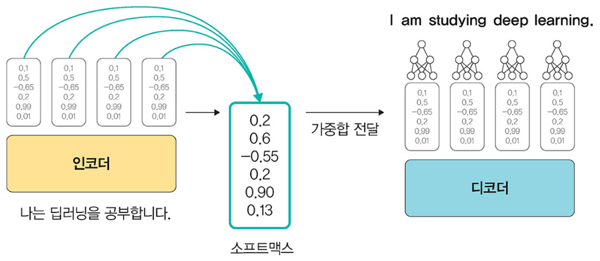


- 트랜스포머는 인코더와 디코더를 여러 개 중첩시킨 구조
- 각각의 디코더를 블록(block)이라고 한다.(논문에선 인코더 블록과 디코더 블록을 여섯 개씩 중첩시킨 구조를 사용)
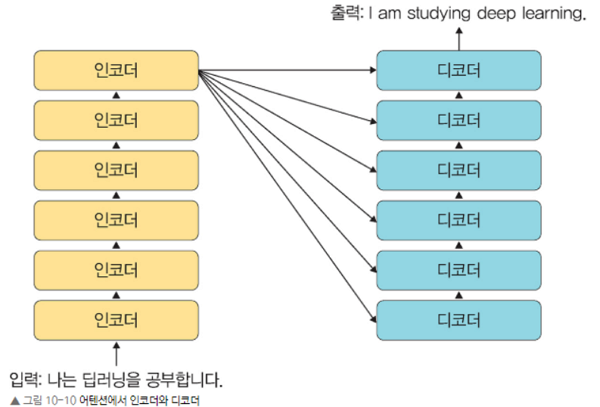

- 하나의 인코더는 <span style="color: 2D3748; background-color:#fff5b1;">**셀프 어텐션(self-attention)**</span>과 <span style="color: 2D3748; background-color:#fff5b1;">**전방향 신경망(feed forward neural network)</span>**으로 구성되어 있다.
- 인코더에서는 단어를 벡터로 임베딩하며, 이를 셀프 어텐션과 전방향 신경망으로 전달한다.
- 셀프 어텐션은 <span style="color: 2D3748; background-color:#fff5b1;">**문장에서 각 단어끼리 얼마나 관계가 있는지를 계산하여 반영한다.**</span>
  - 이를 통해 문장 안에서 단어 간 관계를 파악할 수 있다.
- 셀프 어텐션에서 파악된 단어 간 관계는 전방향 신경망으로 전달된다.  
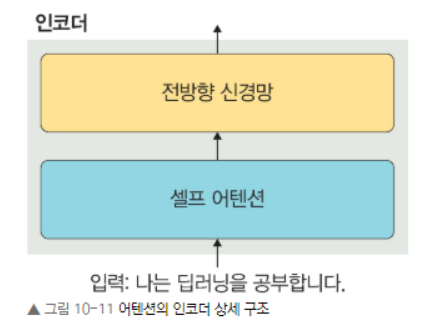


- 디코더는 층을 세 개 가지고 있는데 인코더에서 넘어온 벡터가 처음으로 만나는 것이 셀프 어텐션 층이다.
- 셀프 어텐션 층을 지나면 <span style="color: 2D3748; background-color:#fff5b1;">**인코더-디코더 어텐션(encoder-decoder attention)**</span>층이 있다.
- 인코더-디코더 층에서는 <span style="color: 2D3748; background-color:#fff5b1;">**인코더가 처리한 정보를 받아 어텐션 메카니즘을 수행하고,**</span> 마지막으로 전방향 신경망으로 데이터가 전달된다.  
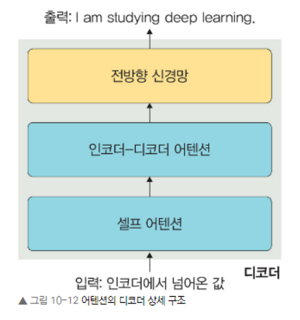

- 어텐션 메카니즘을 작동시키기 위해선 가장 먼저 **<span style="color: 2D3748; background-color:#fff5b1;">어텐션 스코어(attention score)</span>**를 구해야 함
$$e_{ij} = a(s_{i-1}, h_j)$$
- 어텐션 스코어란 **<span style="color: 2D3748; background-color:#fff5b1;">현재 디코더의 시점 $i$에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태$(h_j)$이 디코더의 현 시점의 은닉 상태$(s_{i-1})$와 얼마나 관련이 있는지(유사한지)를 판단하는 값</span>**
- 앞의 수식을 통해 인코더의 모든 은닉 상태의 값과$(h_j)$과 디코더에서의 이전 시점의 은닉 상태$(s_{i-1})$값을 이용하여 계산할 수 있다.

<br>

- 어텐션 스코어가 계산되었다면, 이 값을 소프트 맥스(softmax) 함수에 적용하여 확률로 변환한다.
- 이렇게 계산된 0~1 사이의 값들이 특정 시점(time step)에 대한 가중치, 즉 시간의 가중치가 되어 다음과 같은 수식을 이용한다.
$$a_{ij} = \frac{\exp (e_{ij})}{∑^{T_x}_{k=1}\exp(e_{ik})}$$
- 이를 이용하여 시간의 가중치($a_{ij}$)와 은닉상태($h_j$}의 가중합을 계산하면 하나의 벡터가 계산되는데, 이것이 **<span style="color: 2D3748; background-color:#fff5b1;">컨텍스트 벡터(context_vector)</span>**이며 수식은 다음과 같다
$$c_i=∑^{T_x}_{j=1} a_{ij} h_j$$

- 마지막으로 디코더의 은닉 상태를 구해야 하는데 이를 위해선 컨텍스트 벡터와 디코더 이전 시점의 은닉 상태와 출력이 필요하다
- 다음과 같이 어텐션이 적용된 인코더-디코더의 수식에서는 컨텍스트 벡터($c_i$)가 계속 변하고 있는 반면에 어텐션이 적용되지 않은 인코더-디코더 수식에서는 컨텍스트 벡터($c$)가 고정되어 있다.
- 이전 시점의 은닉 상태 값을 구하는 공식은 다음과 같다


<div align="center">(어텐션 적용) 이전 시점의 은닉상태 값을 구하는 수식: $s_i = f(s_{i-1}, y_{i-1}, c_i$)</div>

<div align="center">(어텐션 미적용) 이전 시점의 은닉상태 값을 구하는 수식: $s_i = f(s_{i-1}, y_{i-1}, c$)</div>

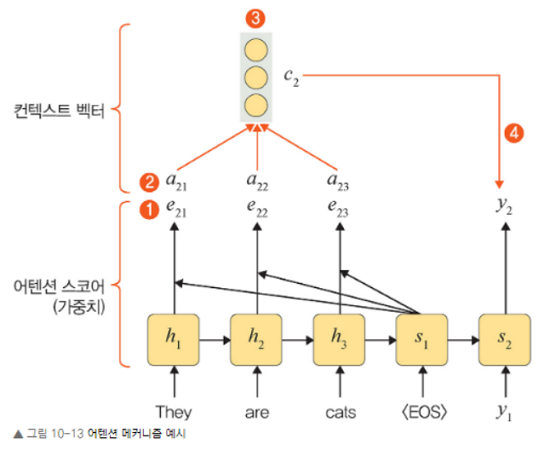

이 모든 과정을 순전파 과정을 통해 정리하면 다음과 같다.  
'They are cats'라는 입력 시퀀스에 대해 현 시점의 디코더의 은닉 상태인 $s_2$와 그 출력인 $y_2$를 계산하기 위해 
1. $s_1$과 모든 인코더 은닉상태와 내적하여 어텐션 스코어를 계산한다.  
2. 어텐션 스코어값인 $e_{21}, e_{22}, e_{23}$들은 소프트맥스 함수를 적용하여 시간의 가중치($a_{21}, a_{22}, a_{23}$)를 구한다.  
3. '시간의 가중치'와 인코더의 은닉 상태 값들을 이용하여 가중합을 계산함으로써 컨텍스트 벡터($c_2$)를 구한다.  
4. 최종적으로 앞에서 구한 컨텍스트 벡터와 디코더 이전 시점의 은닉 상태와 출력을 이용하여 디코더의 은닉상태($y_2$)를 출력한다.

## seq2seq

seq2seq(Sequence to Sequence)는 입력 시퀀스(input sequence)에 대한 출력 시퀀스(Output sequence)를 만들기 위한 모델

seq2seq는 입력 시퀀스의 $x_1:n$과 의미가 동일한 출력 시퀀스 $y_1:m$을 만드는 것이며 $x_i, y_i$간의 관계는 중요하지 않다. 그리고 각 시퀀스의 길이도 서로 다를 수 있다.  

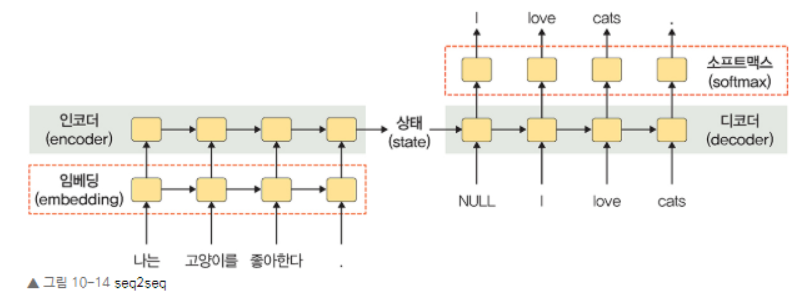

In [5]:
# https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/09/glove/

In [6]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2022-07-04 06:58:06--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.227.219.81, 13.227.219.79, 13.227.219.43, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.227.219.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.05s   

2022-07-04 06:58:06 (50.4 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/It

In [7]:
from __future__ import unicode_literals, print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# 데이터 준비
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang:               # 딕셔너리를 만들기 위한 클래스
  def __init__(self):     # 단어의 인덱스를 저장하기 위한 컨테이너를 초기화
    self.word2index = {}
    self.word2count = {}
    self.index2word = {0:'SOS', 1:'EOS'} 
    self.n_words = 2      # SOS, EOS에 대한 카운트

    # SOS(Start Of Sequence): 문장의 시작
    # EOS(End Of Sequence): 문장의 끝

  def addSentence(self, sentence):  # 문장을 단어 단위로 분리한 후 컨테이너(word)에 추가
    for word in sentence.split(' '):
      self.addWord(word)

  def addWord(self, word):
    if word not in self.word2index:
      self.word2index[word] = self.n_words
      self.word2count[word] = 1
      self.index2word[self.n_words] = word
      self.n_words += 1
    else:
      self.word2count[word] += 1

In [9]:
# a = pd.DataFrame({'eng':['I am a stupid guy! ^^', 'what a nice weather', "we shouldn't do that..."],
#                   'fra':['eikxnsdf eiwji sdfq', 'eiwj isijew kncdsee', 'wiejoik sdi kksjelije sek']})
# sen1, sen2 = read_sentence(a, 'eng', 'fra')

# lang1 = Lang()
# lang2 = Lang()

# for i in range(len(a)):
#   pairrr = []
#   fulll = [sen1[i], sen2[i]]

#   lang1.addSentence(sen1[i])
#   lang2.addSentence(sen2[i])
#   pairrr.append(fulll)

# lang1.word2index, lang1.word2count, lang1.index2word

In [10]:
# 데이터 정규화
def normalizeString(df, lang):
  sentence = df[lang].str.lower()
  sentence = sentence.str.replace('[^A-Za-z\s]+', '', regex=True) # a-z, A-Z, _, ?,! 등을 제외하고 모두 공백으로 바꿈
  sentence = sentence.str.normalize('NFD')             # 유니코드 정규화 방식
  sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')  # unicode를 ASCII로 변환
  return sentence

def read_sentence(df, lang1, lang2):
  sentence1 = normalizeString(df, lang1)
  sentence2 = normalizeString(df, lang2)
  return sentence1, sentence2

def read_file(loc, lang1, lang2):
  df = pd.read_csv(loc, delimiter='\t', header=None, names= [lang1, lang2])
  return df

def process_data(lang1, lang2):
  df = read_file('/content/data/eng-fra.txt', lang1, lang2)
  sentence1, sentence2 = read_sentence(df, lang1, lang2)

  input_lang = Lang()
  output_lang = Lang()
  pairs = []

  for i in range(len(df)):
    if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:

      # 첫번째와 두번째 열을 합쳐서 저장
      full = [sentence1[i], sentence2[i]]
      # 입력으로 영어를 사용
      input_lang.addSentence(sentence1[i])
      # 출력으로 프랑스어를 사용
      output_lang.addSentence(sentence2[i])
      # pairs에는 입력과 출력이 합쳐진 것을 사용
      pairs.append(full)

  return input_lang, output_lang, pairs

In [11]:
# 텐서로 변환

# 문장을 단어로 분리하고 인덱스를 반환
def indexesFromSentence(lang, sentence):    
  return [lang.word2index[word] for word in sentence.split(' ')]

# 딕셔너리에서 단어에 대한 인덱스를 가져오고 문장의 끝에 토큰을 추가
def tensorFromSentence(lang, sentence):     
  indexes = indexesFromSentence(lang, sentence)
  indexes.append(EOS_token)
  return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

# 입력과 출력 문장을 텐서로 변환하여 반환
def tensorFromPair(input_lang, output_lang, pair): 
  input_tensor = tensorFromSentence(input_lang, pair[0])
  target_tensor = tensorFromSentence(output_lang, pair[1])
  return (input_tensor, target_tensor)

파이토치에서 seq2seq를 사용하기 위해선 인코더와 디코더를 정의해야 한다.

입력(영어) 문장이 인코더로 주입되면 디코더(프랑스어)로 번역되어 출력된다. 인코더와 디코더를 이용하면 문장의 번역 뿐만이 아니라 다음 입력을 예측하는 것이 가능하다. 이때 입력 문장의 끝에는 문장의 끝을 알리는 토큰(EOS)이 할당된다.

임베딩 계층은 입력에 대한 임베딩 결과가 저장되어 있는 딕셔너리를 조회하는 테이블과도 같다. 이후 GRU 계층과 연결되는데, GRU 계층은 연속하여 들어오는 입력을 계산한다. 또한, 이전 계층의 은닉 상태를 계산한 후 망각 게이트와 업데이트 게이트를 갱신한다.

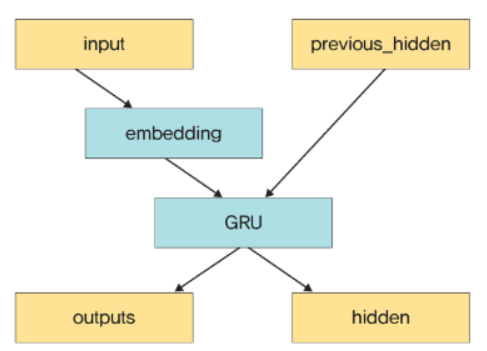

In [12]:
# 인코더 네트워크

class Encoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, embed_dim, num_layers):
    super(Encoder, self).__init__()
    self.input_dim = input_dim      # 인코더에서 사용할 입력층
    self.embed_dim = embed_dim      # 인코더에서 사용할 임베딩 계층
    self.hidden_dim = hidden_dim    # 인코더에서 사용할 은닉층(이전 은닉층)
    self.num_layers = num_layers      # 인코더에서 사용할 GRU의 계층 개수
    self.embedding = nn.Embedding(input_dim, self.embed_dim)    # 임베딩 계층 초기화
    self.gru = nn.GRU(self.embed_dim, self.hidden_dim, num_layers=self.num_layers)
    # 임베딩 차원, 은닉층 차원, GRU의 계층 개수를 이용하여 GRU 계층을 초기화

  def forward(self, src):
    embedded = self.embedding(src).view(1, 1, -1) # 임베딩 처리
    outputs, hidden = self.gru(embedded)          # 임베딩 결과를 GRU 모델에 적용
    return outputs, hidden

디코더는 인코더의 출력을 디코딩하여 다음 출력을 예측한다.  
디코더는 임베딩 계층, GRU 계층, 선형(linear) 계층으로 구성된다. 임베딩 계층에서는 출력을 위해 딕셔너리를 조회할 테이블을 만들며, GRU 계층에서는 다음 단어를 예측하기 위한 확률을 계산한다.  그 후 선형 계층에서는 계산된 확률 값 중 최적의 값(최종 출력 단어)을 선택하기 위해 소프트맥스 활성화 함수를 사용한다.

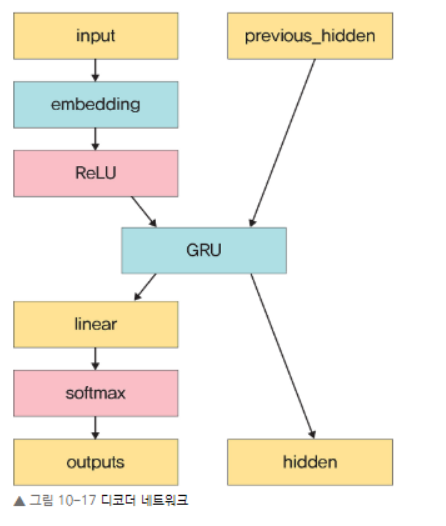

In [13]:
class Decoder(nn.Module):
  def __init__(self, output_dim, hidden_dim, embed_dim, num_layers):
    super(Decoder, self).__init__()

    self.embed_dim = embed_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.num_layers = num_layers

    self.embedding = nn.Embedding(output_dim, self.embed_dim)  # 임베딩 계층 초기화
    self.gru = nn.GRU(self.embed_dim, self.hidden_dim, num_layers = self.num_layers)  # GRU 계층 초기화

    self.out = nn.Linear(self.hidden_dim, output_dim)  # 선형 계층 초기화
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    input = input.view(1, -1)   # 입력을 (1, 배치크기)로 변경
    embedded = F.relu(self.embedding(input))
    outputs, hidden = self.gru(embedded, hidden)
    prediction = self.softmax(self.out(outputs[0]))
    return prediction, hidden

1. 로그 소프트맥스(LogSoftmax)는 소프트맥스와 로그함수의 결합
$$\log (y_i) = \log 	\left[ \frac{\exp(x_i)}{\sum_{j=1} \exp(x_j)} \right] = x_i - \log (\sum_{j=1} \exp(x_j))$$ 

소프트맥스 활성화 함수에서 발생할 수 있는 기울기 소멸 문제를 방지하기 위해 만들어진 활성화 함수.  
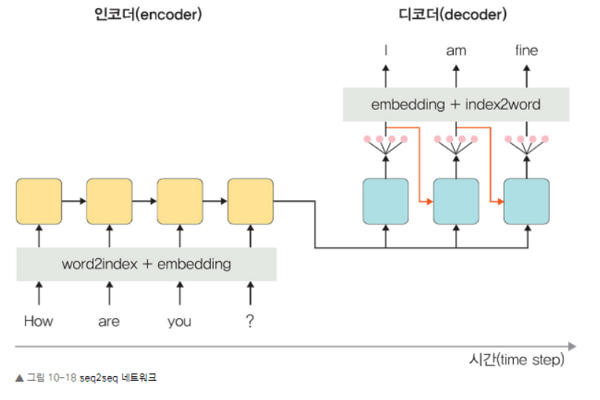

In [14]:
# seq2seq 네트워크

class Seq2Seq(nn.Module):
  def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
    super().__init__()
    
    self.encoder = encoder  # 인코더 초기화
    self.decoder = decoder  # 디코더 초기화
    self.device = device

  def forward(self, input_lang, output_lang, teacher_forcing_ratio= 0.5):
    input_length = input_lang.size(0)   # 입력 문자 길이(문장의 단어 수)
    batch_size = output_lang.shape[1]
    target_length = output_lang.shape[0]
    vocab_size = self.decoder.output_dim
    outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)  # 예측된 출력을 저장하기 위한 변수 초기화

    for i in range(input_length):
      encoder_output, encoder_hidden = self.encoder(input_lang[i])  # 문장의 모든 단어를 인코딩

    decoder_hidden = encoder_hidden.to(device)                # 인코더의 은닉층을 디코더의 인닉층으로 사용
    decoder_input = torch.tensor([SOS_token], device=device)  # 첫번째 예측 단어 앞에 토큰 (SOS) 추가

    for t in range(target_length):
      decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
      outputs[t] = decoder_output
      teacher_force = random.random() < teacher_forcing_ratio
      topv, topi = decoder_output.topk(1)  
      # topv: 가장 확률이 큰 값에 대한 value
      # topi: 기징 확률이 큰 값에 대한 index
      input = (output_lang[t] if teacher_force else topi)  # teacher_force를 활성화하면 목표단어를 다음 입력으로 사용
      if (teacher_force == False and input.item() == EOS_token):
        break
    return outputs

In [15]:
# 모델의 오차 계산 함수 정의

teacher_forcing_ratio=0.5

def Model(model, input_tensor, target_tensor, model_optimizer, criterion):
  model_optimizer.zero_grad()
  input_length = input_tensor.size(0)
  loss = 0
  epoch_loss = 0
  output = model(input_tensor, target_tensor)
  num_iter = output.size(0)

  for ot in range(num_iter):
    # 모델의 예측 결과와 정답(예측 결과)을 이용하여 오차를 계산
    loss += criterion(output[ot], target_tensor[ot]) 
    
  loss.backward()
  model_optimizer.step()
  epoch_loss = loss.item() / num_iter
  return epoch_loss

In [16]:
# 모델 훈련 함수 정의

def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
  model.train()
  optimizer = optim.SGD(model.parameters(), lr=0.01) # 옵티마이저로 SGD를 사용
  criterion = nn.NLLLoss()
  total_loss_iterations = 0

  training_pairs = [tensorFromPair(input_lang, output_lang, random.choice(pairs)) for i in range(num_iteration)]

  for iter in range(1, num_iteration+1):
    training_pair = training_pairs[iter-1]
    input_tensor = training_pair[0]
    target_tensor = training_pair[1]
    # Model 객체를 사용하여 오차를 계산
    loss = Model(model, input_tensor, target_tensor, optimizer, criterion)
    total_loss_iterations += loss

    if iter % 5000 == 0:
      average_loss = total_loss_iterations / 5000
      total_loss_iterations = 0
      print('%d %.4f' % (iter, average_loss))

  torch.save(model.state_dict(), '/content/mytraining.pt')
  return model

`criterion = nn.NLLoss()`:  
NLLoss는 크로스엔트로피 손실 함수(CrossEntropyLoss)와 마찬가지로 분류문제에 사용한다. 하지만 크로스엔트로피 손실 함수에는 LogSoftmax + NLLoss가 포함되어 있다. 따라서 크로스엔트로피 손실 함수를 사용할 경우에는 소프트맥스 함수를 명시하지 않아도 되지만 NLLoss를 사용할 때는 소프트맥스 함수를 사용할 것임을 명시해야 한다.

In [17]:
# 모델 평가

def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
  with torch.no_grad():
    input_tensor = tensorFromSentence(input_lang, sentences[0])   # 입력 문자열을 텐서로 변환
    output_tensor = tensorFromSentence(output_lang, sentences[1]) # 출력 문자열을 텐서로 변환
    decoded_words = []
    output = model(input_tensor, output_tensor)

    for ot in range(output.size(0)):
      topv, topi = output[ot].topk(1)

      if topi[0].item() == EOS_token:
        decoded_words.append('<EOS>')
        break

      else:
        # 예측 결과를 출력 문자열에 추가
        decoded_words.append(output_lang.index2word[topi[0].item()])
  return decoded_words

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10):
  # 훈련 데이터셋으로부터 임의의 문장을 가져와서 모델 평가
  for i in range(n):
    pair = random.choice(pairs)
    print('input: {}'.format(pair[0]))
    print('output: {}'.format(pair[1]))

    output_words = evaluate(model, input_lang, output_lang, pair)  # 모델 평가는 output_words에 저장
    print(output_words)
    output_sentence = ' '.join(output_words)
    print('predicted: {}'.format(output_sentence))

In [18]:
# 모델 훈련

lang1 = 'eng'
lang2 = 'fra'
input_lang, output_lang, pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print('random sentence {}'.format(randomize))

input_size = input_lang.n_words
output_size = output_lang.n_words
print('Input: {} Output: {}'.format(input_size, output_size)) # 입력과 출력에 대한 단어 수 출력

embed_size = 256
hidden_size= 512
num_layers = 1
num_iteration = 75000   # 75000번 반복하여 모델 훈련

# 인코더에 훈련 데이터셋을 입력하고 모든 출력과 은닉 상태를 저장
# 디코더에 첫번째 입력으로 <SOS> 토큰이 제공되고, 인코더의 마지막 은닉상태가 디코더의 첫번째 은닉 상태로 제공
# 인코더-디코더 모델(Seq2Seq)의 객체 생성
encoder = Encoder(input_size, hidden_size, embed_size, num_layers)  
decoder = Decoder(output_size, hidden_size, embed_size, num_layers) 
model = Seq2Seq(encoder, decoder, device).to(device)

print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration) # 모델 학습

random sentence ['i was playing a game when i felt an earthquake', 'jtais en train de jouer quand jai senti un tremblement de terre']
Input: 13366 Output: 25937
Encoder(
  (embedding): Embedding(13366, 256)
  (gru): GRU(256, 512)
)
Decoder(
  (embedding): Embedding(25937, 256)
  (gru): GRU(256, 512)
  (out): Linear(in_features=512, out_features=25937, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 4.8512
10000 4.6720
15000 4.5724
20000 4.5880
25000 4.5220
30000 4.5036
35000 4.4836
40000 4.4734
45000 4.4432
50000 4.4870
55000 4.3911
60000 4.4178
65000 4.4375
70000 4.4272
75000 4.3964


In [19]:
evaluateRandomly(model, input_lang, output_lang, pairs)

input: i think id rather walk
output: je pense que je prfrerais marcher
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: she was loved by everybody in the village
output: elle tait aime de tout le monde dans le village
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: my fathers birthday falls on sunday this year
output: cette anne lanniversaire de mon pre tombe un dimanche
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: i heard you whistling you must be happy
output: je vous ai entendus siffler vous devez tre heureux
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: i have the minutes of the meeting
output: je dispose du compterendu de la runion
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: i dont have any evidence
output: je nai aucune preuve
['je', 'ne', '', '<EOS>']
predicted: je ne  <EOS>
input: i cant tell you how happy i am that youve come to visit us
output: je ne peux pas vous dire combien je suis heureuse que vous soyez venu nous rend

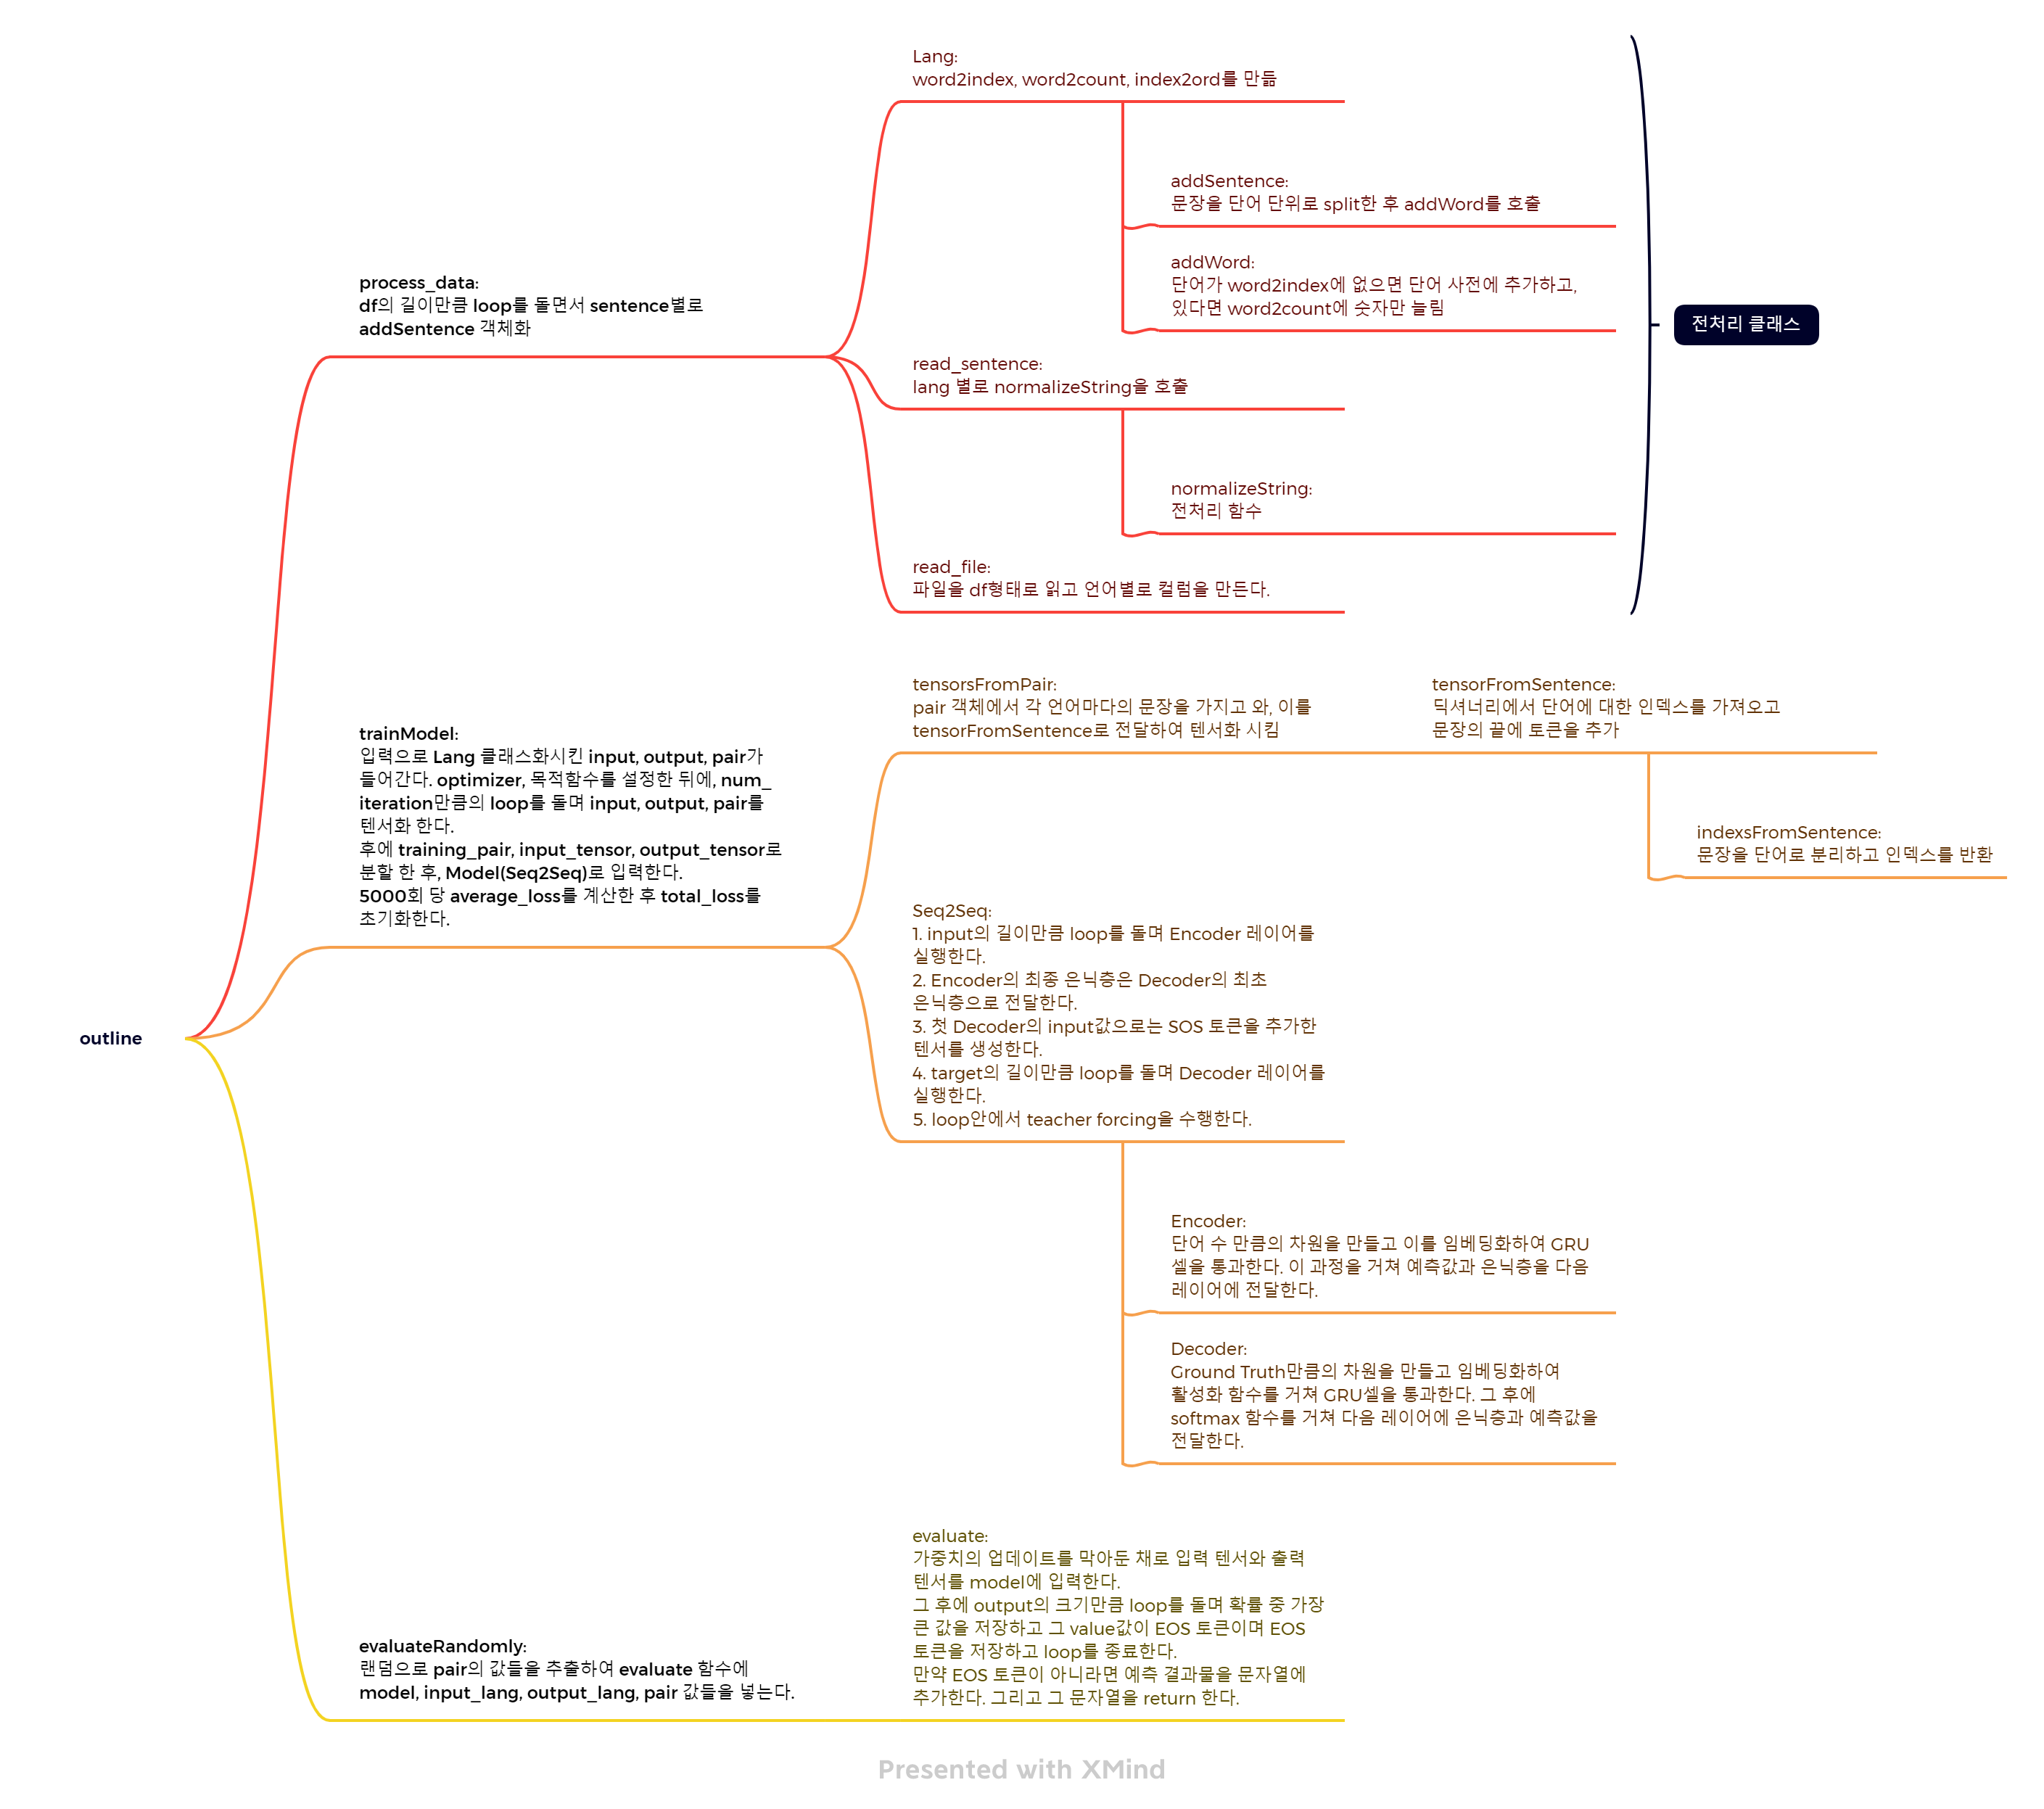

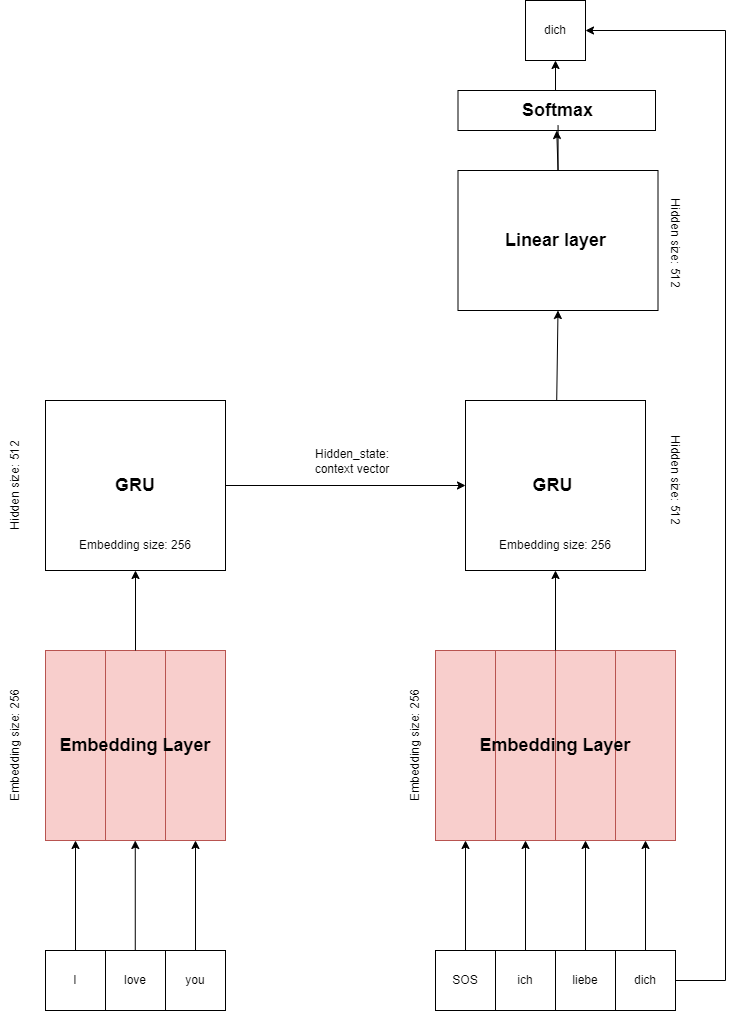